In [7]:
import json
import requests as r
import pandas as pd
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np





In [8]:
co_list = ["HSI","0005","0011","0388","0939","1299","1398","2318","2388","2628","3328","3988"]
url_list = [f'%5EHSI', '0005.HK', '0011.HK', '0388.HK', '0939.HK', '1299.HK', '1398.HK', '2318.HK', '2388.HK', '2628.HK', '3328.HK', '3988.HK']
day_b10 = int(datetime(int(date.today().strftime("%Y"))-10,int(date.today().strftime("%m")),int(date.today().strftime(f"%d"))).timestamp())
today = int(datetime(int(date.today().strftime("%Y")),int(date.today().strftime("%m")),int(date.today().strftime(f"%d"))+1).timestamp())

for i in range(len(co_list)) :
        url = (f"https://query1.finance.yahoo.com/v8/finance/chart/{url_list[i]}?symbol={url_list[i]}&period1={day_b10}&period2={today}&useYfid=true&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-US&region=US&crumb=c0iNuYsQEnn&corsDomain=finance.yahoo.com")
        header = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
        res = r.get(url,headers=header)
        content = json.loads(res.text)

        date1 = content['chart']['result'][0]['timestamp']
        date2 = [date.fromtimestamp(date1[j]).strftime(f"%Y-%m-%d") for j in range(len(date1))]
        open = content['chart']['result'][0]['indicators']['quote'][0]['open']
        close = content['chart']['result'][0]['indicators']['quote'][0]['close']
        adjclose = content['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']
        high = content['chart']['result'][0]['indicators']['quote'][0]['high']
        low = content['chart']['result'][0]['indicators']['quote'][0]['low']
        volume = content['chart']['result'][0]['indicators']['quote'][0]['volume']

        ###Count the day of "close" and "adjclose" are different.
        #n = 0
        #nl = []
        #for k in range(len(close)) :
        #    if close[k] == adjclose[k]:
        #        continue
        #    else :
        #       n += 1
        #       nl.append(date2[k])
        #if n != 0 :
        #        print(f'''There are {n} days data difference between "close" and "adjclose" in {co_list[i]}.''')

        d = {"date": date2, "open": open, "close": close, "high": high, "low": low, "volume": volume}
        df = pd.DataFrame(d)[::-1]

        rate1 = (df.loc[:,"close"].values[:-1]-df.loc[:,"close"].values[1:])/df.loc[:,"close"].values[1:]*100
        rate2 = np.array([0])
        mix_rate = np.append(rate1,rate2)
        df["rate%"] = mix_rate.tolist()
        x = df.pop("rate%")
        df.insert(3,"rate%",x)
        df["difference"] = df["high"]-df["low"]
        x = df.pop("difference")
        df.insert(6,"difference",x)

        if i == 0 :
                df_HSI = df
        elif i == 1 :
                df_0005 = df
        elif i == 2 :
                df_0011 = df
        elif i == 3 :
                df_0388 = df
        elif i == 4 :
                df_0939 = df
        elif i == 5 :
                df_1299 = df
        elif i == 6 :
                df_1398 = df
        elif i == 7 :
                df_2318 = df
        elif i == 8 :
                df_2388 = df
        elif i == 9 :
                df_2628 = df
        elif i == 10 :
                df_3328 = df
        elif i == 11 :
                df_3988 = df
        else :
                print("Check the code.")

In [9]:
df_0005

,date,open,close,rate%,high,low,difference,volume
2464,2022-10-11,40.450001,40.400002,0.123923,40.700001,40.200001,0.500000,7109110
2463,2022-10-10,40.549999,40.349998,-2.181822,40.599998,40.099998,0.500000,19875821
2462,2022-10-07,41.450001,41.250000,-2.366864,41.700001,41.150002,0.549999,12696068
2461,2022-10-06,42.400002,42.250000,-0.937870,42.599998,41.900002,0.699997,11803426
2460,2022-10-05,42.950001,42.650002,5.700132,43.200001,42.500000,0.700001,37615359
...,...,...,...,...,...,...,...,...
4,2012-10-17,76.150002,76.550003,1.795221,76.750000,76.099998,0.650002,23059388
3,2012-10-16,74.699997,75.199997,1.211297,75.199997,74.699997,0.500000,15373738
2,2012-10-15,74.250000,74.300003,0.134779,74.449997,73.900002,0.549995,5490836
1,2012-10-12,73.949997,74.199997,1.021103,74.349998,73.750000,0.599998,8089518


In [10]:
df_0939

,date,open,close,rate%,high,low,difference,volume
2464,2022-10-11,4.52,4.52,-0.220756,4.55,4.50,0.05,34287523
2463,2022-10-10,4.52,4.53,-1.521733,4.56,4.48,0.08,194807679
2462,2022-10-07,4.62,4.60,-1.075273,4.65,4.59,0.06,85192815
2461,2022-10-06,4.70,4.65,-0.641020,4.72,4.64,0.08,117445373
2460,2022-10-05,4.56,4.68,4.932731,4.72,4.55,0.17,227782928
...,...,...,...,...,...,...,...,...
4,2012-10-17,5.79,5.78,1.760570,5.79,5.73,0.06,319318278
3,2012-10-16,5.84,5.68,-1.899830,5.84,5.64,0.20,322939006
2,2012-10-15,5.71,5.79,0.520829,5.80,5.71,0.09,268708253
1,2012-10-12,5.69,5.76,1.766791,5.82,5.68,0.14,543132359


array([[<AxesSubplot: xlabel='HSI', ylabel='HSI'>,
        <AxesSubplot: xlabel='0005', ylabel='HSI'>,
        <AxesSubplot: xlabel='0011', ylabel='HSI'>,
        <AxesSubplot: xlabel='0388', ylabel='HSI'>,
        <AxesSubplot: xlabel='0939', ylabel='HSI'>,
        <AxesSubplot: xlabel='1299', ylabel='HSI'>,
        <AxesSubplot: xlabel='1398', ylabel='HSI'>,
        <AxesSubplot: xlabel='2318', ylabel='HSI'>,
        <AxesSubplot: xlabel='2388', ylabel='HSI'>,
        <AxesSubplot: xlabel='2628', ylabel='HSI'>,
        <AxesSubplot: xlabel='3328', ylabel='HSI'>,
        <AxesSubplot: xlabel='3988', ylabel='HSI'>],
       [<AxesSubplot: xlabel='HSI', ylabel='0005'>,
        <AxesSubplot: xlabel='0005', ylabel='0005'>,
        <AxesSubplot: xlabel='0011', ylabel='0005'>,
        <AxesSubplot: xlabel='0388', ylabel='0005'>,
        <AxesSubplot: xlabel='0939', ylabel='0005'>,
        <AxesSubplot: xlabel='1299', ylabel='0005'>,
        <AxesSubplot: xlabel='1398', ylabel='0005'>,
      

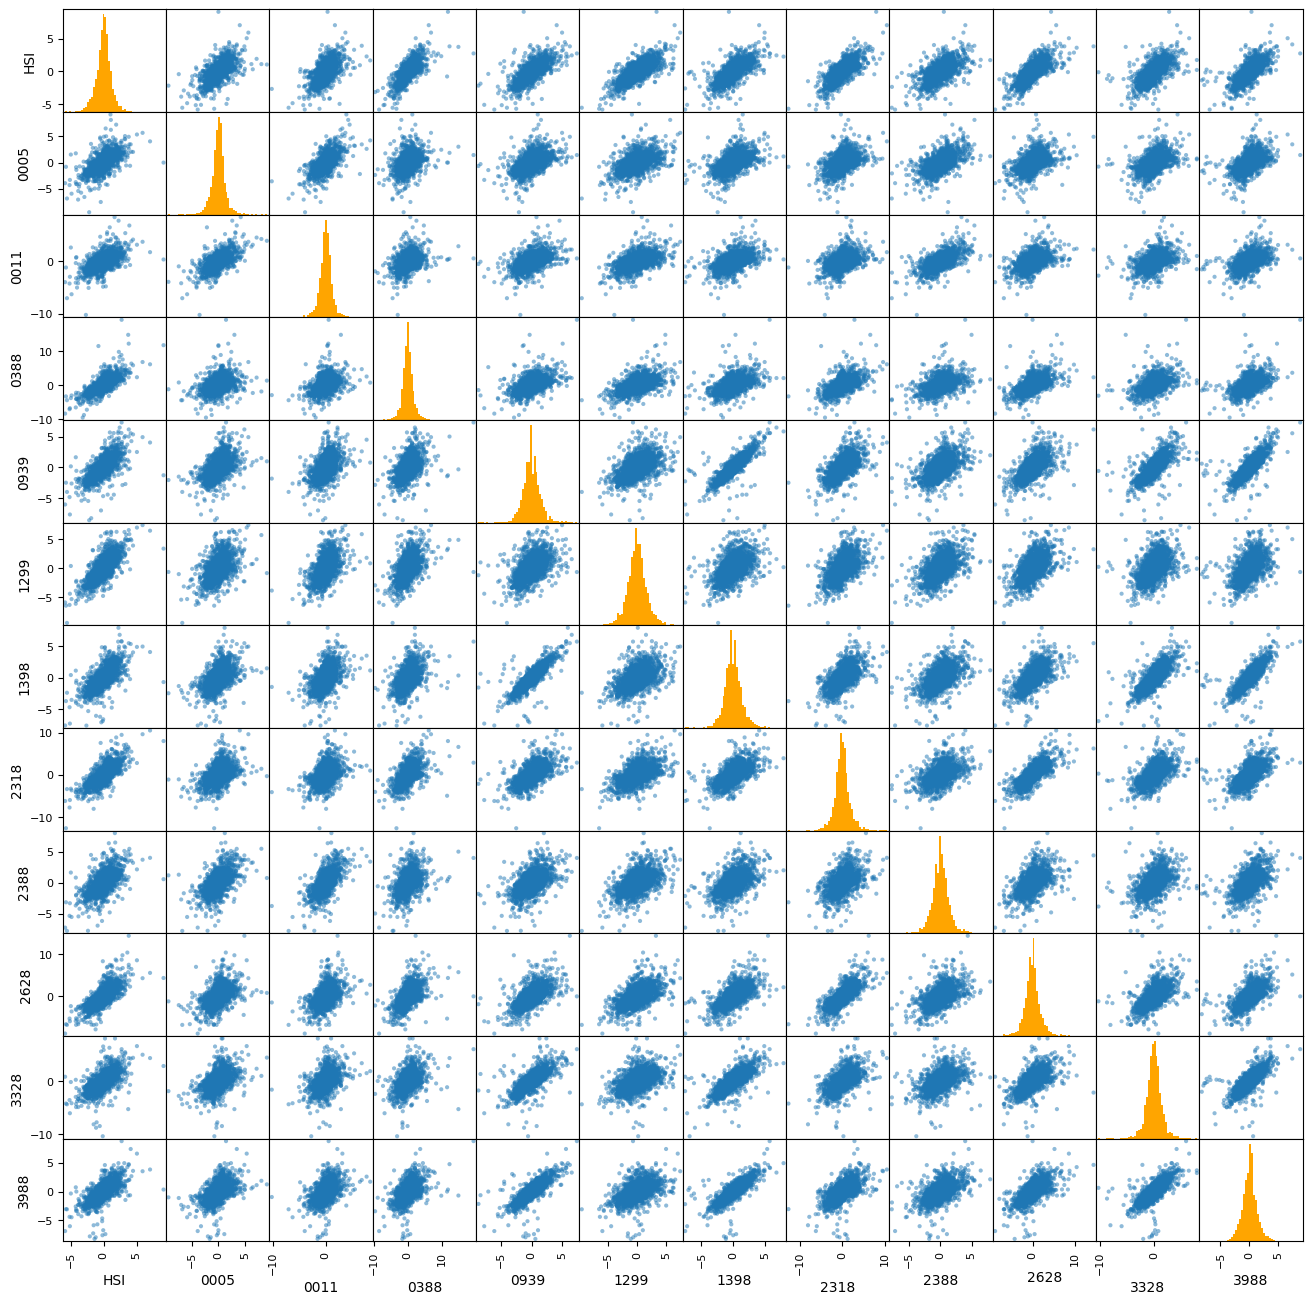

In [11]:
# framework in pandas that allows us to work easily with scatter matrices
# combining with the daily percentage change of all the stocks
# Scatter matrices can determine if there is a linear correlation with two variables. 
# The above graph is the combination of histograms for each company and a subsequent scattered plot taking 3 companies’ stocks at a time. 
# the plots in the lower triangular area are the same as the plots in the upper triangular area with just axes interchanged. 
# So, analyzing either set of plots would suffice.

from pandas.plotting import scatter_matrix

box_df = pd.concat([df_HSI['rate%'], df_0005['rate%'], df_0011['rate%'], df_0388['rate%'], df_0939['rate%'],df_1299['rate%'],df_1398['rate%'],df_2318['rate%'],df_2388['rate%'],df_2628['rate%'],df_3328['rate%'], df_3988['rate%']],axis = 1)
box_df.columns = ['HSI','0005', '0011','0388','0939', '1299', '1398', '2318', '2388','2628', '3328','3988'] 
scatter_matrix(box_df, figsize = (16,16), hist_kwds={'bins':50,'color':'orange'})


<Figure size 640x480 with 0 Axes>

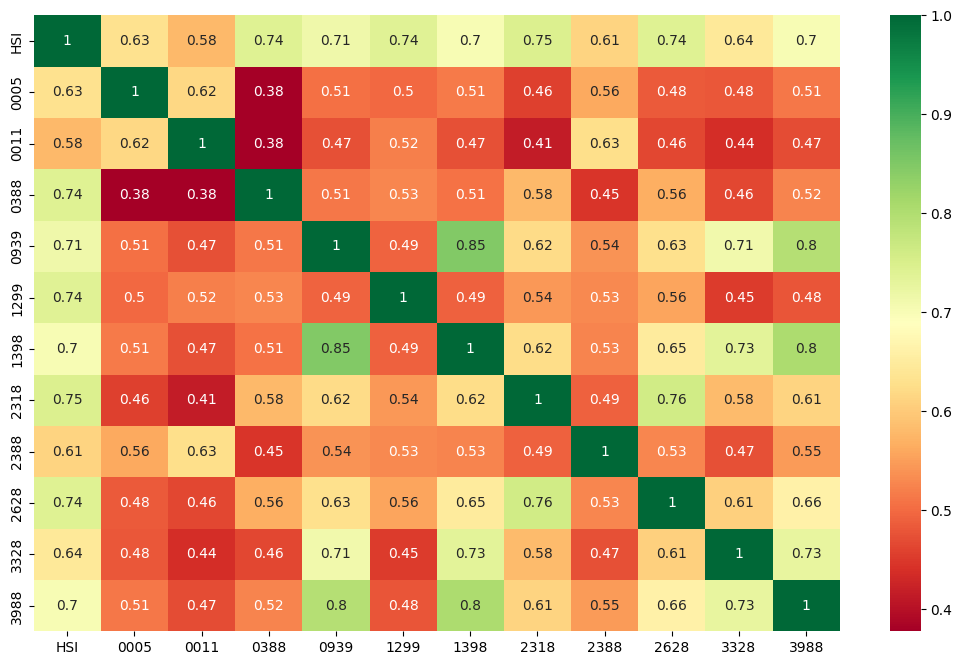

<Figure size 640x480 with 0 Axes>

In [12]:
# framework in seaborn that allows us to work easily with heatmap.
# Green color depicts
# From the graph, we can clearly figure out that the pair 1398 and 0939 has the highest a linear correlation.
# Followed by 0939&3988 and 1398&3988. Their values are around 0.8

corr_df = box_df.corr(method='pearson')

plt.figure(figsize=(13, 8))
sns.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()

In [13]:
corr_df = box_df.corr(method='pearson')

corr_df.apply(lambda row: row[row >= 0.8].index, axis=1)



HSI                      Index(['HSI'], dtype='object')
0005                    Index(['0005'], dtype='object')
0011                    Index(['0011'], dtype='object')
0388                    Index(['0388'], dtype='object')
0939            Index(['0939', '1398'], dtype='object')
1299                    Index(['1299'], dtype='object')
1398    Index(['0939', '1398', '3988'], dtype='object')
2318                    Index(['2318'], dtype='object')
2388                    Index(['2388'], dtype='object')
2628                    Index(['2628'], dtype='object')
3328                    Index(['3328'], dtype='object')
3988            Index(['1398', '3988'], dtype='object')
dtype: object

In [14]:
df_0005['date'].dtype

dtype('O')

Text(0.5, 1.0, '3 stocks identified')

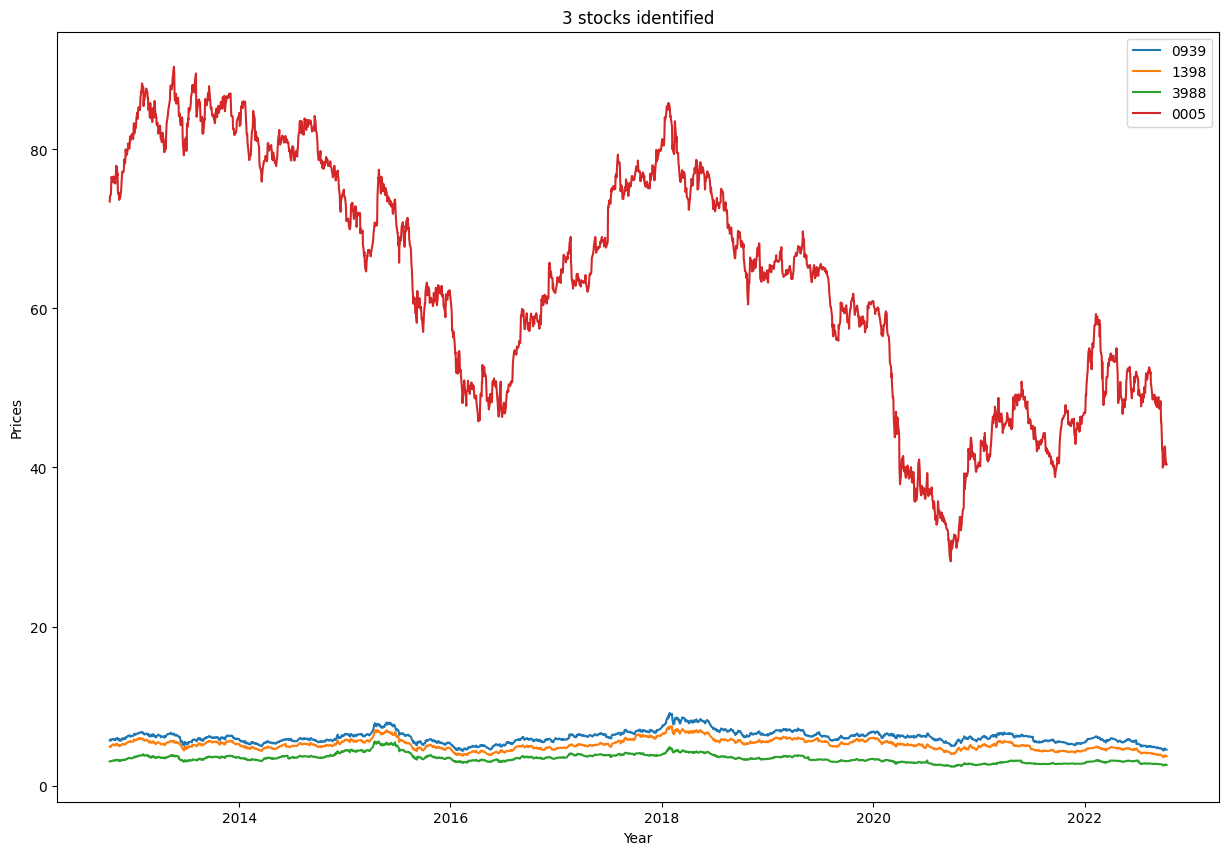

In [15]:
# Matplotlib line plot

# showing simple price movement over the period

figure, axis = plt.subplots()
figure.set_size_inches(15, 10, forward=True)

df_0939['date'] = pd.to_datetime(df_0939['date'])
df_1398['date'] = pd.to_datetime(df_1398['date'])
df_3988['date'] = pd.to_datetime(df_3988['date'])
df_0005['date'] = pd.to_datetime(df_0005['date'])


axis.plot(df_0939['date'], df_0939['close'],label = '0939')
axis.plot(df_1398['date'], df_1398['close'],label = '1398')
axis.plot(df_3988['date'], df_3988['close'],label = '3988')
axis.plot(df_0005['date'], df_0005['close'],label = '0005')

plt.xlabel("Year")
plt.ylabel("Prices")
plt.legend()
axis.set_title("3 stocks identified")

Text(0.5, 1.0, 'Volume of 3 stocks identified vs popular stock HSBC 0005')

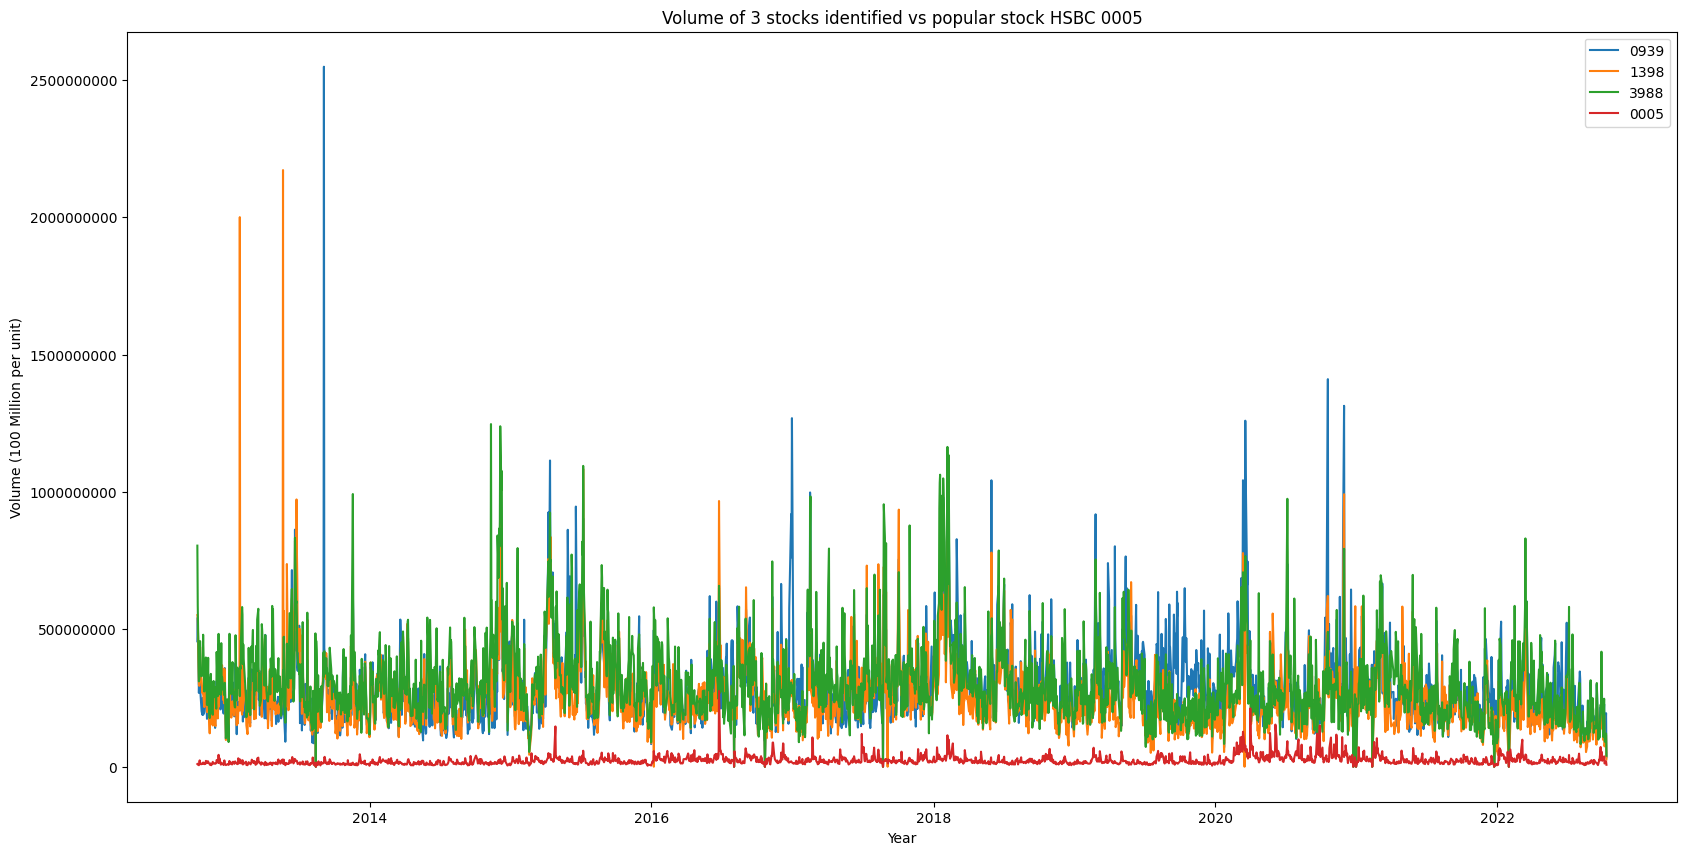

In [16]:

figure, axis = plt.subplots()
figure.set_size_inches(20, 10, forward=True)


axis.plot(df_0939['date'], df_0939['volume'],label = '0939')
axis.plot(df_1398['date'], df_1398['volume'],label = '1398')
axis.plot(df_3988['date'], df_3988['volume'],label = '3988')

axis.plot(df_0005['date'], df_0005['volume'],label = '0005')

axis.get_yaxis().get_major_formatter().set_scientific(False)
plt.xlabel("Year")
plt.ylabel("Volume (100 Million per unit)")
plt.legend()
axis.set_title("Volume of 3 stocks identified vs popular stock HSBC 0005")

Text(0.5, 1.0, 'Diff stocks boxplot')

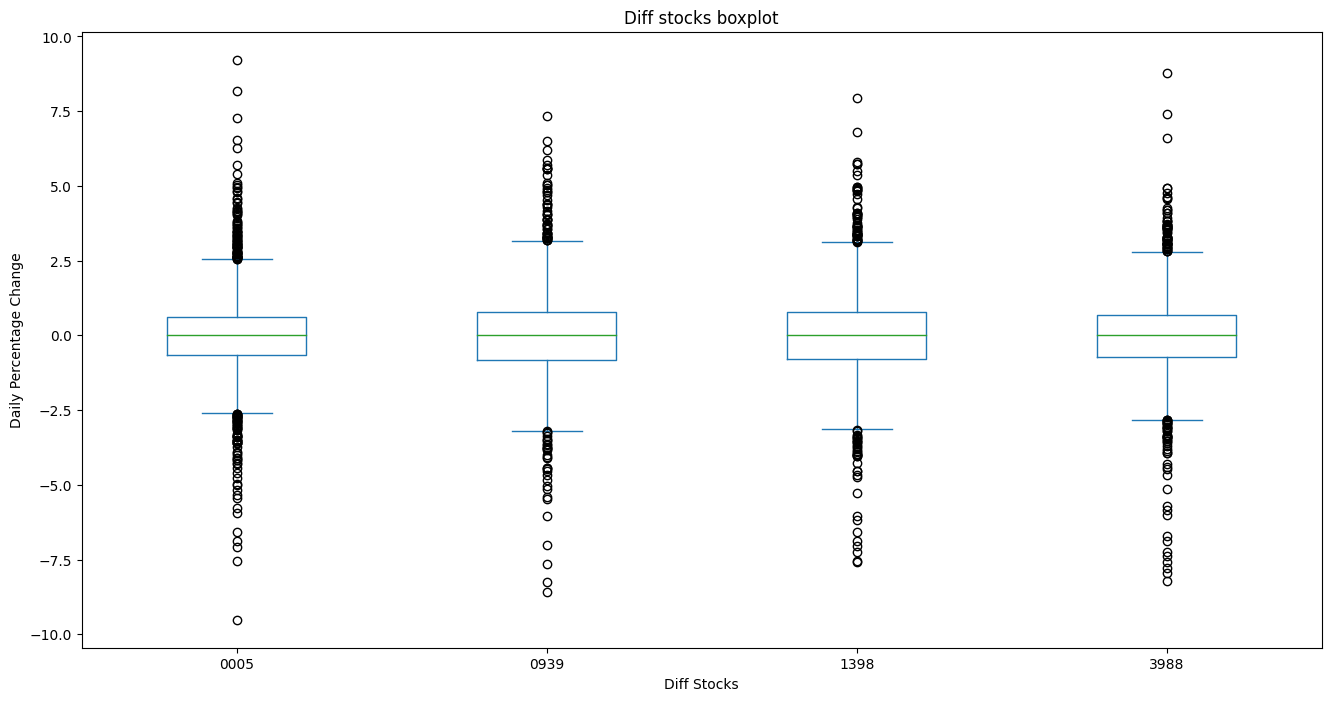

In [29]:
# We will call the pandas box method.
#Percentage increase in stock value is the change in stock comparing that to the previous day. 
#The bigger the value either positive or negative the volatile the stock is. 
# The daily percentage change of 0939 is taller than the others, this means this stock is more volatile.


# Q0/4：(minimum）
# Q1/4:（lower quartile）
# Q2/4：(median）
# Q3/4：(upper quartile）
# Q4/4：(maximum）

# mild ouliner = 1.5 * IQR to 3 * IQR
# extreme ouliner = over 3 * IQR

box_df = pd.concat([df_0005['rate%'],df_0939['rate%'],df_1398['rate%'],df_3988['rate%']],axis=1)

box_df.columns = ['0005','0939','1398', '3988'] 


box_df.plot(kind='box',figsize = (16,8))

plt.xlabel("Diff Stocks")
plt.ylabel("Daily Percentage Change")
plt.title("Diff stocks boxplot")


############# count the numgber of outliners<<<<<<<<<<<<<<<<<<<<<<
# pairtrading more or less 



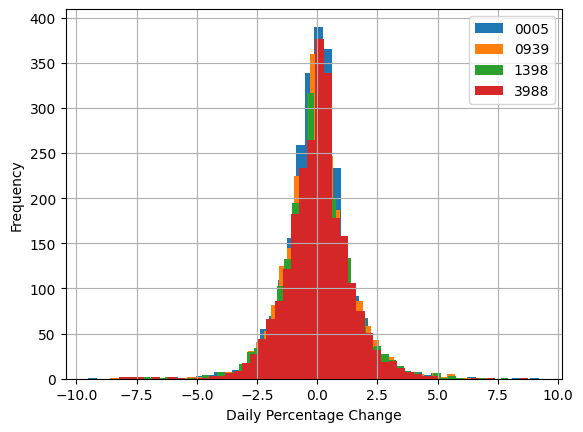

In [31]:
#we plot out the histogram using the .hist method and we also specify the number of bins we want. 
# The thicker our histogram is the more volatile the stock is.
# The width of the histogram shape is related to the standard deviation of the distribution. 
# It is clear from the graph that the percentage increase in stock price histogram for 0939 is the widest , followed by 1398
# which indicates the stock is the most volatile among the three companies compared.



df_0005['rate%'].hist(bins = 50, label='0005')
df_0939['rate%'].hist(bins = 50, label='0939')
df_1398['rate%'].hist(bins = 50, label='1398')
df_3988['rate%'].hist(bins = 50, label='3988')

plt.xlabel("Daily Percentage Change")
plt.ylabel("Frequency")

plt.legend()

In [19]:
# Count the number of time of these pairs going in diff directions

In [20]:
# •	Aim - What are you doing
    # Idetifying a pair of stocks to perform pair trading.
    # With more volatility relatively compared to other stocks, potentially more profits
    # With high liquidity/high trading – easy to trade at any time
    # Pair Trading does a good job at eliminating market-wide risk that allows you to remain market neutral.

#	Business Value - Why are you doing this
    #When a pair trade performs as expected,the investor profits
    #Profits are generated when the underperforming security regains value, and the outperforming security’s price deflates. 
    #The net profit is the total gained from the two positions.

# Example : 
          
          #To illustrate the potential profit of the pairs trade strategy, consider Stock A and Stock B, which have a high correlation of 0.95. 
          # The two stocks deviate from their historical trending correlation in the short-term, with a correlation of 0.50.
          #The arbitrage trader steps in to take a dollar matched the long position on underperforming Stock A and a short position on outperforming Stock B. 
          #The stocks converge and return to their 0.95 correlation over time. The trader profits from a long position and closed short position.         


#	Data Collection - Website, How (Webscraping/API, libraries used)
#	Data Preprocessing - briefly what you did for cleaning up the data, final DF
#	Insight Analysis
#	Challenges, Limitations, and Next Steps
#	Conclusion

In [21]:
# Studying only these 3 pairs
# 0939 & 1398, 1398 & 3988, 0939 & 3988

In [22]:
consol_rate = pd.concat([df_HSI['date'], df_0939['rate%'], df_1398['rate%'], df_3988['rate%']], axis =1)
consol_rate.columns = ['Date','0939_rate', '1398_rate','3988_rate'] 

df6 = consol_rate

df6

,Date,0939_rate,1398_rate,3988_rate
2464,2022-10-11,-0.220756,-0.540540,-0.384615
2463,2022-10-10,-1.521733,-1.333332,-0.763358
2462,2022-10-07,-1.075273,-0.793650,-0.380237
2461,2022-10-06,-0.641020,-0.787401,-0.378788
2460,2022-10-05,4.932731,4.958673,3.529418
...,...,...,...,...
4,2012-10-17,1.760570,1.844256,0.325733
3,2012-10-16,-1.899830,-1.214574,-0.324675
2,2012-10-15,0.520829,-0.403225,0.325733
1,2012-10-12,1.766791,1.431496,0.986841


In [23]:
# Example of counting daily pair trading opportunity 
# Testing if the product of Daily return of any of these two pairs of a particular day is negative 
# Meaning they temporaily deviates

df_0939['date'] = pd.to_datetime(df_0939['date'])
df_1398['date'] = pd.to_datetime(df_1398['date'])
df_3988['date'] = pd.to_datetime(df_3988['date'])

count = 0
for i in df6.index:
    if (df6['0939_rate'].values[i]* df6['1398_rate'].values[i]) < 0:
      print(df6['Date'].values[i])
      count +=1

count

2012-10-15
2012-10-25
2012-11-06
2012-11-12
2012-12-06
2012-12-07
2012-12-17
2012-12-20
2012-12-28
2013-01-11
2013-01-23
2013-01-31
2013-02-04
2013-02-06
2013-02-15
2013-02-27
2013-03-05
2013-04-08
2013-05-03
2013-05-16
2013-05-22
2013-05-30
2013-05-31
2013-06-17
2013-06-27
2013-07-18
2013-07-25
2013-08-15
2013-08-30
2013-09-06
2013-09-12
2013-09-23
2013-10-18
2013-11-01
2013-11-04
2013-11-20
2013-12-09
2013-12-18
2014-01-15
2014-02-26
2014-03-13
2014-03-17
2014-03-27
2014-04-24
2014-04-28
2014-05-09
2014-05-20
2014-06-04
2014-06-05
2014-06-11
2014-06-19
2014-07-02
2014-10-13
2014-10-14
2014-11-07
2014-11-27
2014-12-10
2014-12-15
2014-12-18
2015-01-28
2015-02-04
2015-02-10
2015-03-20
2015-04-16
2015-04-22
2015-05-04
2015-05-11
2015-05-13
2015-05-14
2015-05-27
2015-06-03
2015-06-19
2015-06-23
2015-06-24
2015-07-03
2015-07-09
2015-07-21
2015-07-31
2015-08-04
2015-08-13
2015-09-18
2015-10-06
2015-10-08
2015-10-20
2015-11-09
2015-12-07
2015-12-15
2015-12-18
2016-01-08
2016-03-09
2016-04-06

240

In [24]:
def count_num_of_pair_trading_op(x,y):
  count = 0
  for i in df6.index:
    if (df6[x].values[i]* df6[y].values[i]) < 0:
      count +=1
  return count


In [25]:
count_num_of_pair_trading_op('0939_rate','1398_rate')

240

In [26]:
count_num_of_pair_trading_op('0939_rate','3988_rate')

229

In [27]:
count_num_of_pair_trading_op('1398_rate','3988_rate')

236

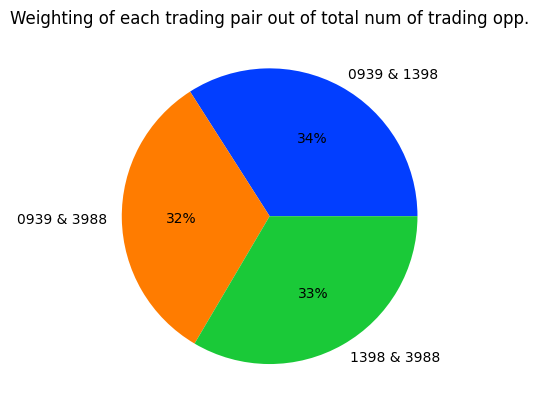

In [28]:
a = count_num_of_pair_trading_op('0939_rate','1398_rate')
b = count_num_of_pair_trading_op('0939_rate','3988_rate')
c = count_num_of_pair_trading_op('1398_rate','3988_rate')

data = [a,b,c]
labels = ['0939 & 1398 ', '0939 & 3988', '1398 & 3988']

colors = sns.color_palette('bright')

plt.title('Weighting of each trading pair out of total num of trading opp.')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# So we picked the pair 0939 & 1398 as there are more trading opp.